In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:

font = {'family' : 'Arial', 
        'weight' : 'normal', 
        'size' : 17, 
        'color' : '#818696'}

In [3]:
plt.style.use('Solarize_Light2')

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df[df.isna().any(axis=1)].head(10)


,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN
5,03/04,Premier League,11,11-01-03,H,Manchester United,Portsmouth FC,3:00,RW,80,2:00,Direct free kick,NaN
6,03/04,FA Cup,Fifth Round,2/14/04,H,Manchester United,Manchester City,4:02,RW,74,3:00,Right-footed shot,NaN
7,03/04,Premier League,29,3/20/04,H,Manchester United,Tottenham Hotspur,3:00,NaN,89,2:00,Right-footed shot,NaN
8,03/04,Premier League,32,04-10-04,A,Manchester United,Birmingham City,1:02,NaN,60,1:01,Header,Ryan Giggs
9,03/04,Premier League,38,5/15/04,A,Manchester United,Aston Villa,0:02,NaN,4,0:01,Right-footed shot,NaN
11,04/05,Premier League,16,12-04-04,H,Manchester United,Southampton FC,3:00,NaN,87,3:00,Right-footed shot,Gary Neville


In [6]:
df['Type'] = df['Type'].fillna('Unknown')
df['Goal_assist'] = df['Goal_assist'].fillna('Unassisted')

In [7]:
df.drop('Playing_Position', axis=1, inplace=True)

In [8]:
goal_type = pd.DataFrame(df['Type'].value_counts().reset_index()).sort_values(by='count', ascending=False)

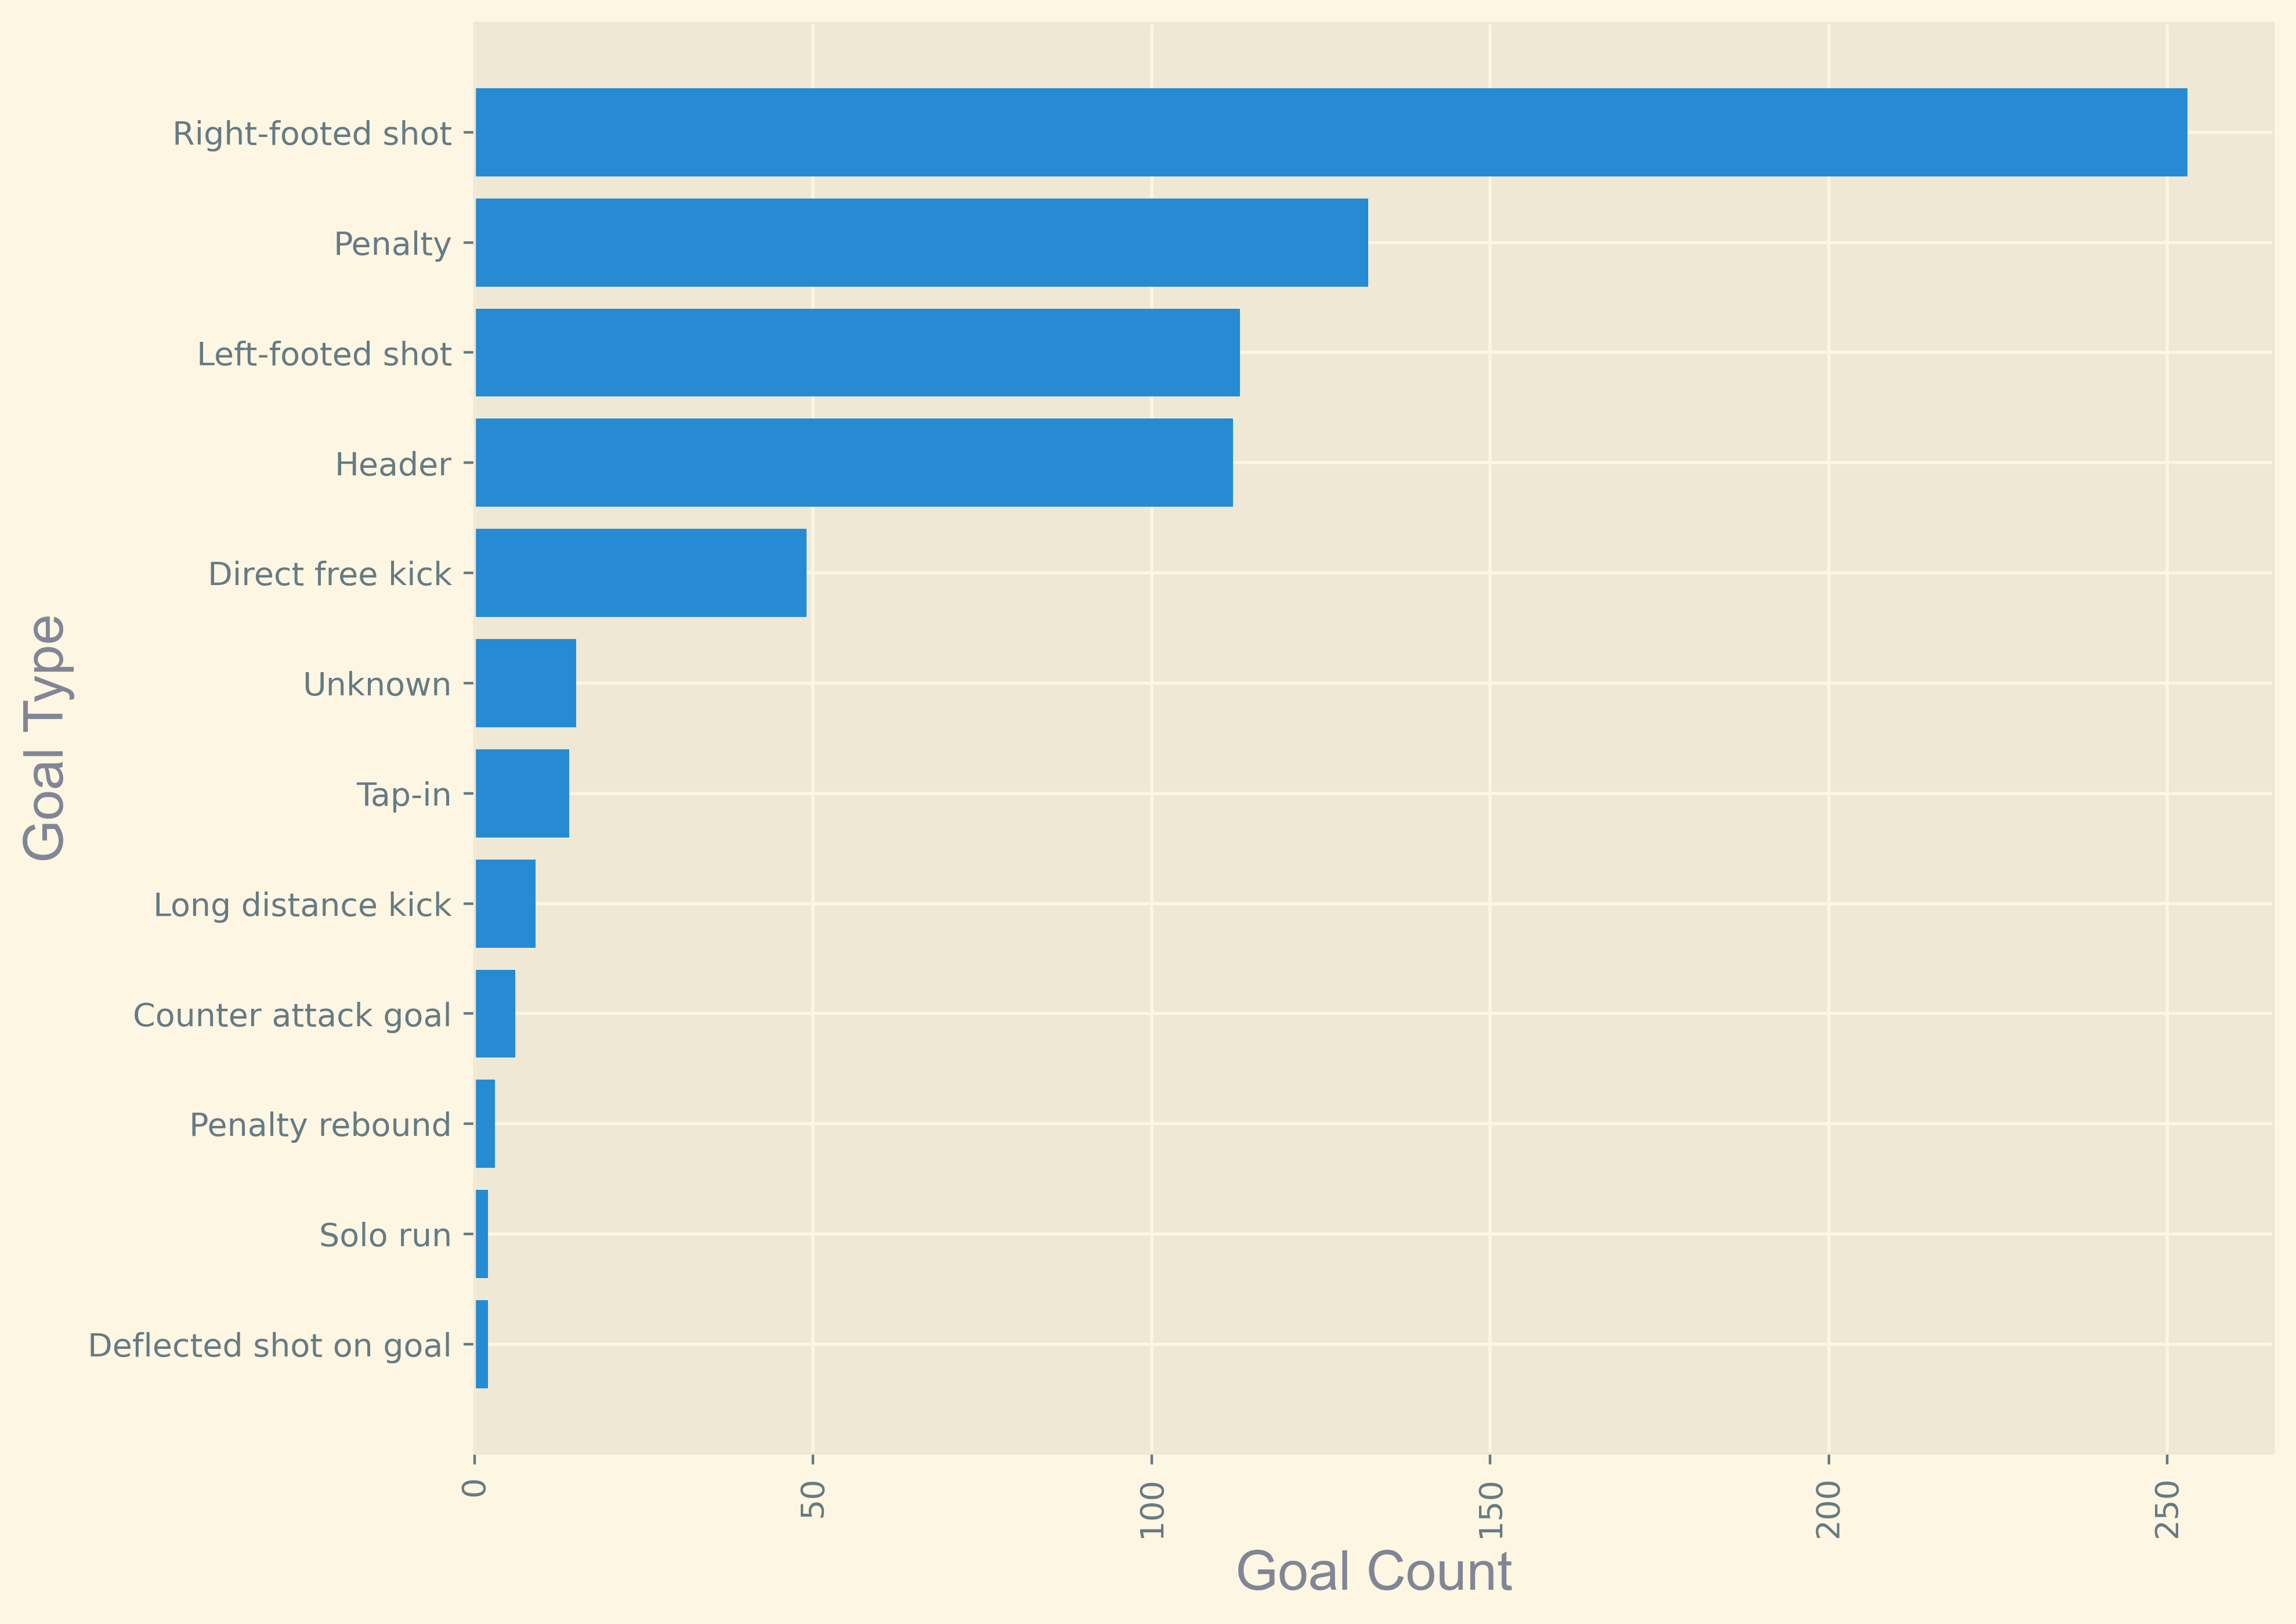

In [9]:
plt.figure(figsize=(10, 8), dpi=400)

plt.barh(goal_type['Type'], goal_type['count'])


plt.title('')
plt.xlabel('Goal Count', fontdict=font)
plt.ylabel('Goal Type', fontdict=font)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.show()

In [22]:
goals_time = pd.DataFrame(df[["Minute"]])
goals_time['Minute'] = goals_time['Minute'].str.replace(r'\+(\d+)', ' ', regex=True)
goals_time['Minute'] = goals_time['Minute']

goals_time["Minute"] = goals_time["Minute"].astype(int)

goals_time = pd.DataFrame(goals_time.value_counts()).sort_index().reset_index()




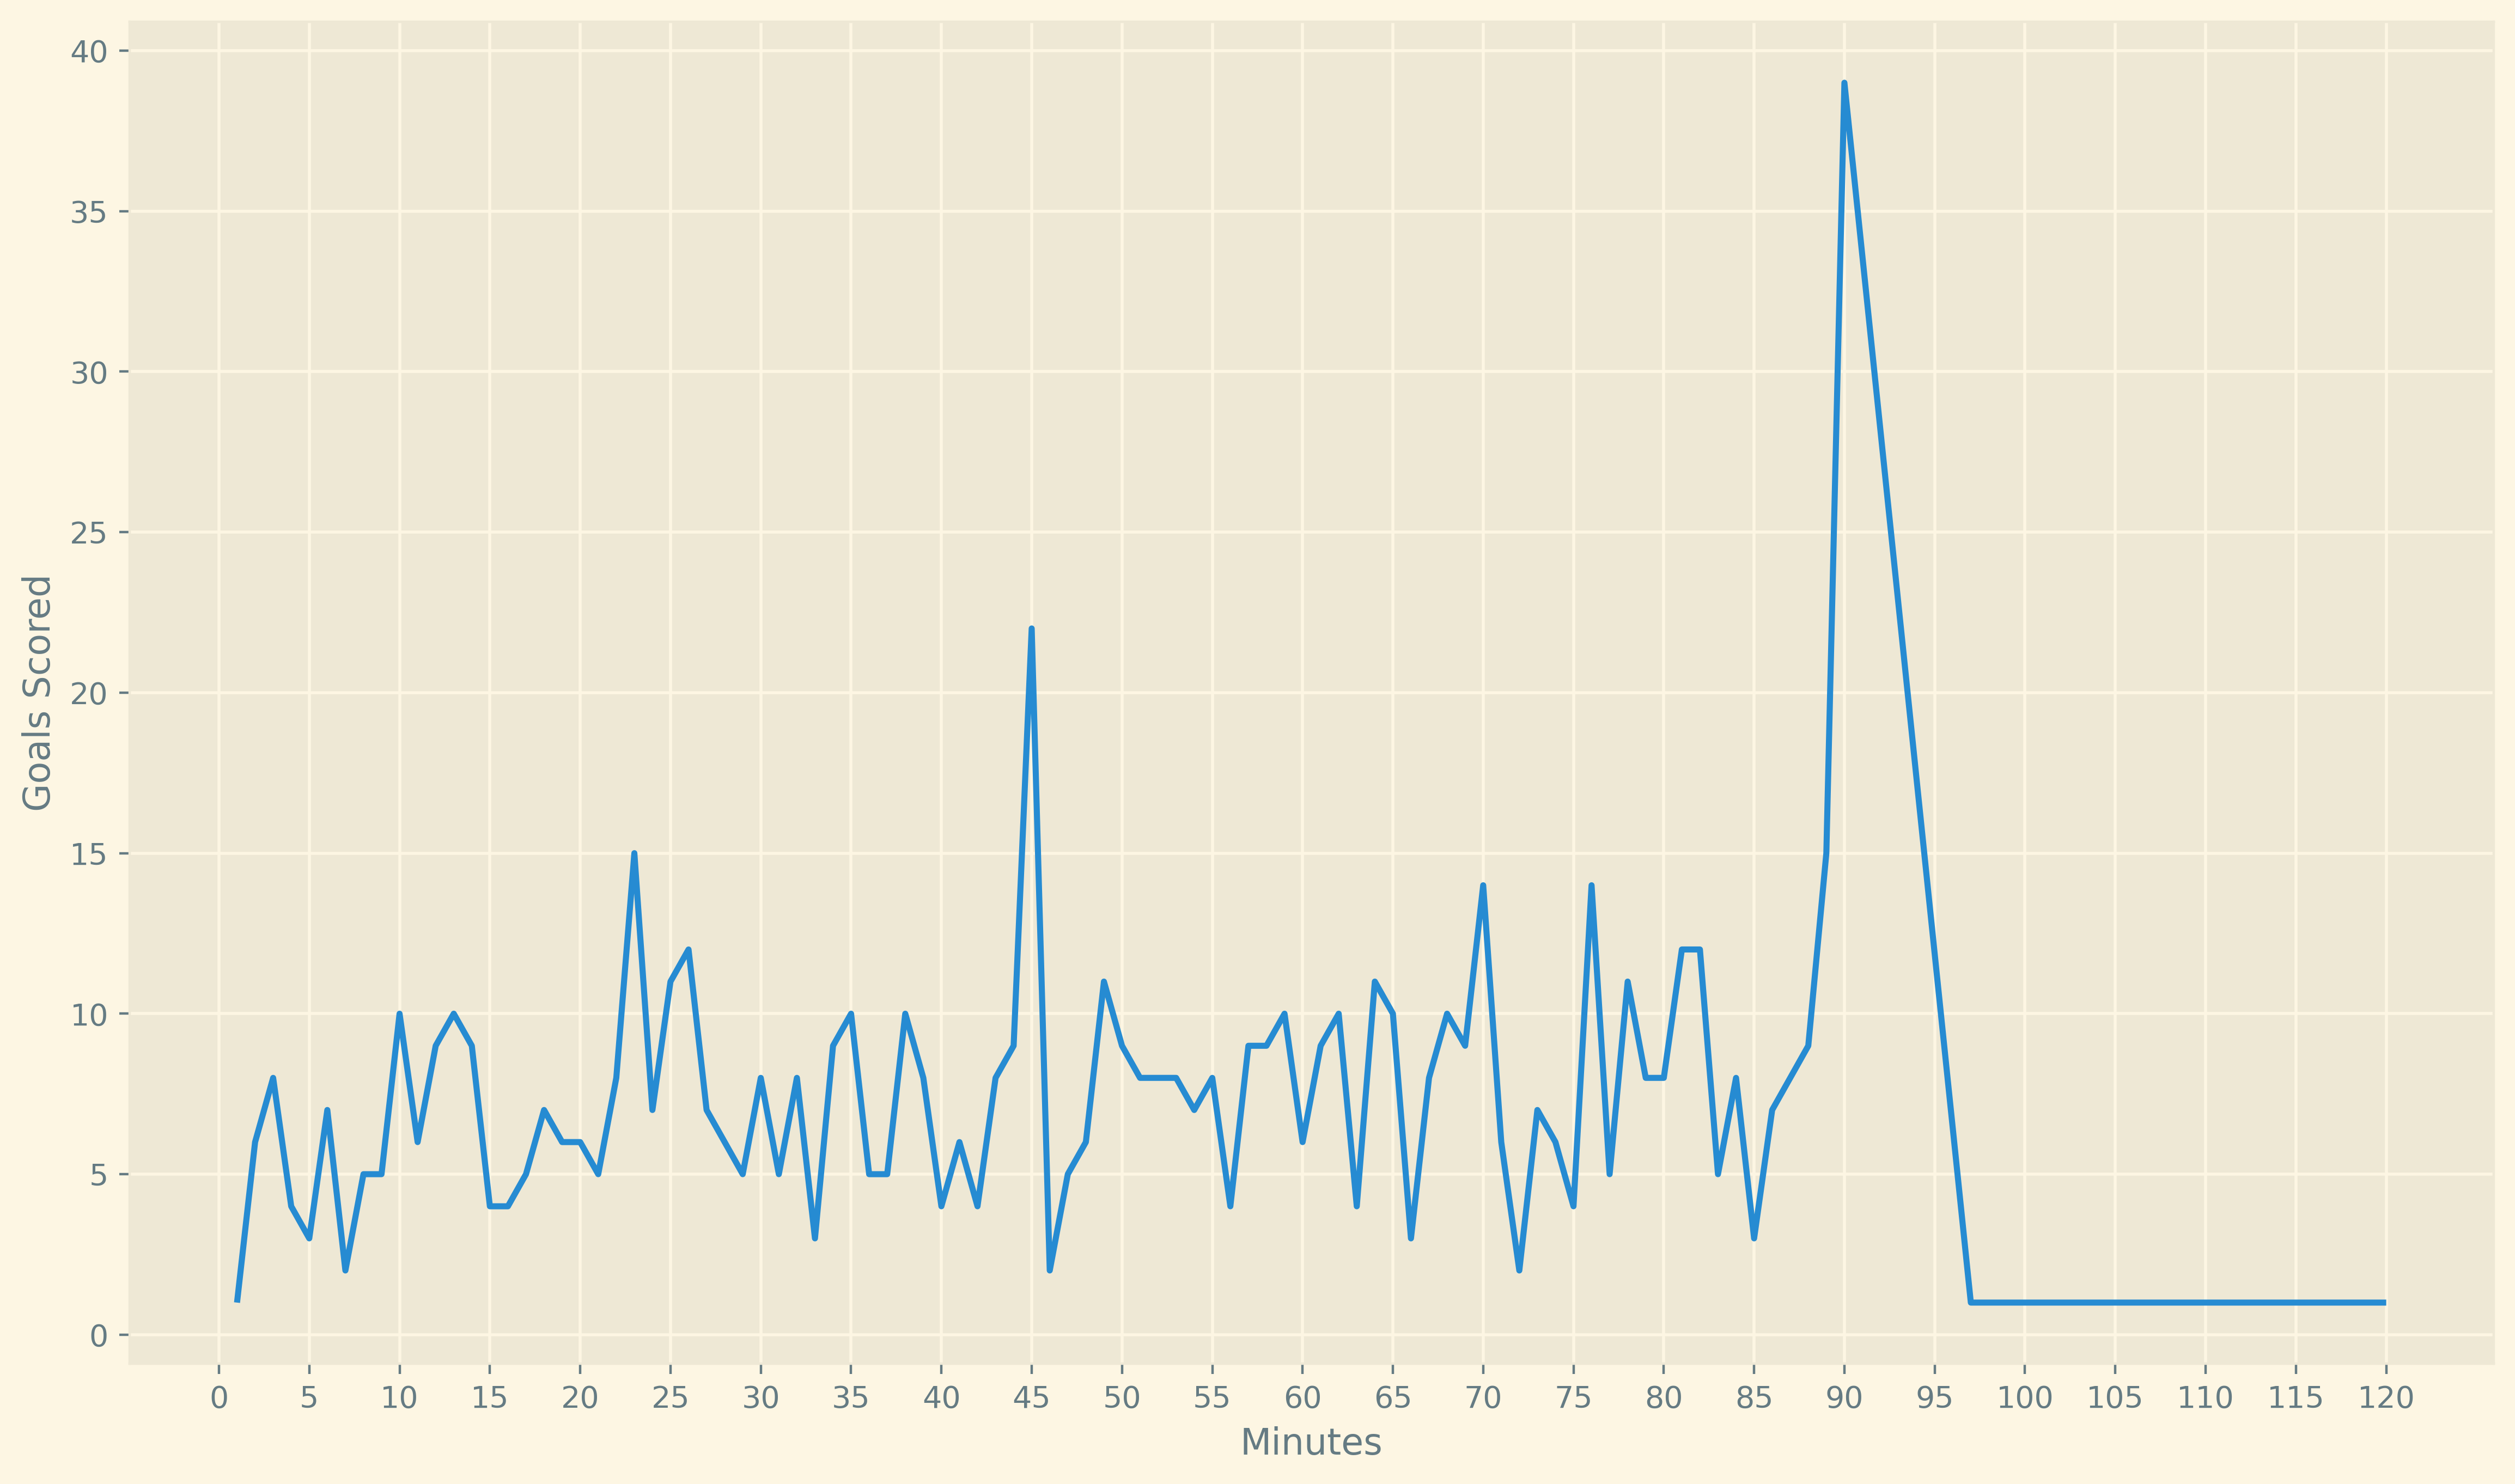

In [34]:
fig , ax = plt.subplots(1, 1, dpi=400, figsize=(14, 8))
ax.plot(goals_time['Minute'], 
        goals_time['count'])

ax.set_xticks(np.arange(0, 125, 5))


ax.set_title('C')
ax.set_xlabel('Minutes')
ax.set_ylabel('Goals Scored')

plt.show()